**News Headlines Categorization Model**






We will use the BBC headline news text, labeled in 5 categories, i.e., 'Tech', 'Sports', 'Business', 'Entertainment', and 'Politics', and train our model with Naive Bayes.

Finally we will try using some random out of the dataset headlines to test whether our model correctly classifies them into respective label class.

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

## Data Reading and Understanding

In [ ]:
bbc_text = pd.read_csv('/content/bbc-text.csv')
bbc_text

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
904,business,marsh executive in guilty plea an executive at...
905,entertainment,bets off after big brother leak a bookmaker ...
906,sport,republic to face china and italy the republic ...
907,politics,butler launches attack on blair former civil s...


In [ ]:
bbc_text.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

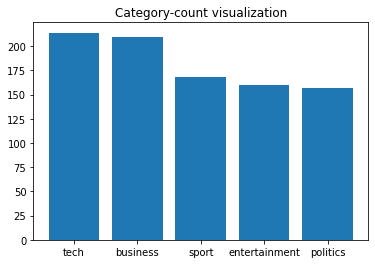

In [ ]:

plt.bar(bbc_text.category.unique(),bbc_text['category'].value_counts())
# plt.plot(testing_data['news_category'].value_counts())
plt.title('Category-count visualization')
plt.show()

There are a total of 5 classes of new's that we have here in our dataset. As our model would require it in numeric form, lets map it to numeric form.

In [ ]:
bbc_text.category = bbc_text.category.map({'tech':0, 'business':1, 'sport':2, 'entertainment':3, 'politics':4})
bbc_text.category.unique()

array([0, 1, 2, 3, 4])

In [ ]:
bbc_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  909 non-null    int64 
 1   text      909 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.3+ KB


In [ ]:
bbc_text.shape

(909, 2)

## Train Test Split

In [ ]:
# bbc_news = bbc_text.values

X = bbc_text.text
y = bbc_text.category

#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1)
print(X_train)
print(y_train)

245    o connell rejects lions rumours ireland and mu...
257    sporting rivals go to extra time the current s...
161    howard s unfinished business  he s not finishe...
651    wife swap makers sue us  copycat  the british ...
551    casino royale is next bond movie casino royale...
                             ...                        
715    lee to create new film superhero comic book ve...
767    lse doubts boost bidders  shares shares in deu...
72     parties build up poll war chests the labour pa...
235    consumer spending lifts us growth us economic ...
37     row threatens hendrix museum plan proposals to...
Name: text, Length: 636, dtype: object
245    2
257    0
161    4
651    3
551    3
      ..
715    3
767    1
72     4
235    1
37     3
Name: category, Length: 636, dtype: int64


## Creating the Bag of Words Representation

We now have to convert the data into a format which can be used for training the model. We'll use the **bag of words representation** for each sentence (document).

Imagine breaking X in individual words and putting them all in a bag. Then we pick all the unique words from the bag one by one and make a dictionary of unique words. 

This is called **vectorization of words**. We have the class ```CountVectorizer()``` in scikit learn to vectorize the words. 

We will also use the `stop_words` in english to clear our data of stop words.


In [ ]:
# countVectorizer

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words = 'english')

In [ ]:
# fit the vectorizer on the training data

vec.fit(X_train)
print(len(vec.get_feature_names()))
vec.vocabulary_

16855


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'connell': 3722,
 'rejects': 12535,
 'lions': 9169,
 'rumours': 13127,
 'ireland': 8280,
 'munster': 10227,
 'lock': 9240,
 'paul': 11155,
 'dismissed': 4885,
 'media': 9765,
 'reports': 12671,
 'linking': 9164,
 'captaincy': 2830,
 'tour': 15466,
 'new': 10417,
 'zealand': 16827,
 'summer': 14770,
 'rumoured': 13126,
 'runners': 13134,
 'job': 8463,
 'says': 13293,
 'totally': 15445,
 'focused': 6341,
 'sunday': 14778,
 'nations': 10327,
 'crunch': 4165,
 'clash': 3274,
 'england': 5548,
 'honestly': 7560,
 'don': 5030,
 'think': 15242,
 'told': 15383,
 'bbc': 1951,
 'sport': 14296,
 'thing': 15240,
 'speculation': 14237,
 'newspaper': 10433,
 'talk': 15019,
 'just': 8565,
 'ignore': 7784,
 'added': 910,
 'annoys': 1332,
 'reading': 12294,
 'opposition': 10774,
 'locks': 9243,
 'imagine': 7811,
 'saying': 13292,
 'going': 6897,
 'guy': 7131,
 'second': 13464,
 'row': 13085,
 'play': 11451,
 'makes': 9455,
 'cringe': 4111,
 'try': 15666,
 'scoring': 13378,
 'international': 8183,
 'de

In [ ]:
# another way of representing the features
X_transformed = vec.transform(X_train)
X_transformed

<636x16855 sparse matrix of type '<class 'numpy.int64'>'
	with 92039 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_transformed)

  (0, 83)	1
  (0, 443)	1
  (0, 758)	1
  (0, 910)	1
  (0, 1054)	2
  (0, 1332)	1
  (0, 1786)	1
  (0, 1951)	1
  (0, 2139)	1
  (0, 2461)	1
  (0, 2766)	1
  (0, 2830)	1
  (0, 3003)	1
  (0, 3004)	1
  (0, 3080)	1
  (0, 3274)	1
  (0, 3277)	1
  (0, 3316)	1
  (0, 3344)	1
  (0, 3473)	1
  (0, 3484)	2
  (0, 3679)	1
  (0, 3722)	4
  (0, 4111)	1
  (0, 4165)	1
  :	:
  (635, 12271)	1
  (635, 12306)	1
  (635, 12589)	1
  (635, 12966)	1
  (635, 13085)	2
  (635, 13128)	1
  (635, 13195)	7
  (635, 13458)	4
  (635, 13872)	1
  (635, 13909)	2
  (635, 13915)	1
  (635, 14479)	1
  (635, 14814)	1
  (635, 15145)	1
  (635, 15271)	1
  (635, 15273)	1
  (635, 15331)	1
  (635, 15702)	1
  (635, 15705)	1
  (635, 16034)	1
  (635, 16112)	1
  (635, 16342)	1
  (635, 16344)	1
  (635, 16525)	1
  (635, 16533)	1


In [ ]:
X_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 9, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# convert X_transformed to sparse matrix, just for readability.
pd.DataFrame(X_transformed.toarray(), columns= [vec.get_feature_names()])

,00,000,000bn,000m,000s,000th,001,001and,007,02,...,zogbia,zola,zombies,zone,zones,zoom,zooms,zorro,zurich,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
633,0,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
634,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We dont use sparse matrix while model building as it unnecessarily creates a dimensionality expansion, where other than a single position all postion carry zero value

In [ ]:
# for test data
X_test_transformed = vec.transform(X_test)
X_test_transformed

<273x16855 sparse matrix of type '<class 'numpy.int64'>'
	with 37090 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_test_transformed)

  (0, 1)	1
  (0, 559)	1
  (0, 565)	1
  (0, 809)	1
  (0, 1466)	1
  (0, 1606)	1
  (0, 2494)	1
  (0, 3304)	2
  (0, 3364)	4
  (0, 3397)	3
  (0, 3509)	2
  (0, 3768)	2
  (0, 3950)	1
  (0, 3985)	1
  (0, 4175)	1
  (0, 4254)	1
  (0, 4277)	1
  (0, 4976)	1
  (0, 5144)	1
  (0, 5146)	2
  (0, 5579)	1
  (0, 6110)	1
  (0, 6174)	1
  (0, 6176)	1
  (0, 6210)	1
  :	:
  (667, 16129)	1
  (667, 16148)	1
  (667, 16712)	1
  (667, 16767)	1
  (667, 17019)	1
  (667, 17328)	1
  (667, 17661)	1
  (667, 17701)	1
  (667, 17772)	1
  (667, 17793)	1
  (667, 17802)	2
  (667, 18760)	1
  (667, 18847)	1
  (667, 19310)	1
  (667, 19765)	2
  (667, 19915)	1
  (667, 20446)	1
  (667, 20484)	1
  (667, 20562)	1
  (667, 20935)	1
  (667, 20951)	1
  (667, 22515)	1
  (667, 23911)	1
  (667, 24548)	1
  (667, 24682)	1


In [ ]:
# convert X_transformed to sparse matrix, just for readability
pd.DataFrame(X_test_transformed.toarray(), columns= [vec.get_feature_names()])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000bn,000m,000s,000th,001,001and,007,02,...,zogbia,zola,zombies,zone,zones,zoom,zooms,zorro,zurich,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building the model

Lets now build a Naive Bayes model, and see if we get any better results

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_transformed, y_train)

MultinomialNB()

In [ ]:
# fit
nb.fit(X_transformed,y_train)

# predict class
y_pred_class = nb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = nb.predict_proba(X_test_transformed)

## Model Evaluation Naive Bayes

In [ ]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9743589743589743

## Confusion Matrix

In [ ]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)

array([[48,  1,  0,  0,  1],
       [ 2, 65,  0,  0,  3],
       [ 0,  0, 63,  0,  0],
       [ 0,  0,  0, 36,  0],
       [ 0,  0,  0,  0, 54]])

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[48  1  0  0  1]
 [ 2 65  0  0  3]
 [ 0  0 63  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 54]]


## Sensitivity and Specificity

In [ ]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

specificity = TN / float(TN + FP)
print("specificity",specificity)

sensitivity 0.9701492537313433
specificity 0.9795918367346939


In [ ]:
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class, average = 'micro'))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class, average = 'micro'))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class, average = 'micro'))

PRECISION SCORE : 0.9743589743589743
RECALL SCORE : 0.9743589743589743
F1 SCORE : 0.9743589743589743


------------------------------------------------------------------------------------------------------------

## Test from random data outside the dataset

   >Lets choose random news headlines from the internet, and see if our model perform well in classifying them

In [ ]:
s1 = ['FIR against Delhi Minorities Commission chairman for inflammatory content on social media']
vec1 = vec.transform(s1).toarray()
print('Headline:' ,s1)
print(str(list(nb.predict(vec1))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS'))

Headline: ['FIR against Delhi Minorities Commission chairman for inflammatory content on social media']
TECH


In [ ]:
relabel = {'0': 'tech', '1': 'business', '2': 'sport', '3': 'entertainment', '4': 'politics'}

In [ ]:
s2 = ['Gautam Adani slips to 4th position on Forbes']
vec2 = vec.transform(s2).toarray()
print('Headline:' ,s2)
print(str(list(nb.predict(vec2))[0]).replace('0', 'TECH').replace('1', 'POLITICS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','BUSINESS'))

Headline: ['Gautam Adani slips to 4th position on Forbes']
BUSINESS


In [ ]:
s3 = ['Apples 2022 "Pro" iPhones feature a notchless display with Dynamic Island, a faster A16 chip, 48-megapixel camera, Crash Detection, satellite connectivity']
vec3 = vec.transform(s3).toarray()
print('Headline:', s3)
print(str(list(nb.predict(vec3))[0]).replace('0', 'TECH').replace('1', 'POLITICS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','BUSINESS'))

Headline: ['Apples 2022 "Pro" iPhones feature a notchless display with Dynamic Island, a faster A16 chip, 48-megapixel camera, Crash Detection, satellite connectivity']
TECH


In [ ]:
s4 = ['Messi is better than ronaldo']
vec4 = vec.transform(s4).toarray()
print('Headline:', s4)
print(str(list(nb.predict(vec4))[0]).replace('0', 'TECH').replace('1', 'BUSINESS').replace('2', 'SPORTS').replace('3','ENTERTAINMENT').replace('4','POLITICS'))

Headline: ['Messi is better than ronaldo']
SPORTS


#### Our Naive Bayes model is performing pretty well on random News Healines out of the dataset !